# 📚 IMDB Sentiment Classification: Model Comparison in Scikit-learn

Summary of the notebook **`4b-Sentiment-Analysis-Scikit-learn-Model-Comparison.ipynb`**

---

### 🎯 **Summary: Scikit-learn Model Comparison on IMDb Sentiment Analysis**

This notebook presents a comparative analysis of four machine learning models applied to binary sentiment classification using the IMDb movie reviews dataset. The process and findings are summarized below:

1. **Data Preparation**

   * IMDb dataset loaded and labels converted to binary (1 = positive, 0 = negative).
   * The dataset was split into training (80%) and testing (20%) sets.

2. **Text Vectorization**

   * All models used a consistent preprocessing pipeline with **TF-IDF vectorization** (max 10,000 features, n-grams up to bigrams).

3. **Model Training & Evaluation**

   * Four classifiers were trained: Logistic Regression, Linear SVM, Multinomial Naive Bayes, and Random Forest.
   * Performance was assessed on the test set using **accuracy** and a full classification report (precision, recall, F1-score).

4. **Key Results**

   * **Linear SVM** achieved the **highest accuracy**, followed closely by Logistic Regression.
   * Naive Bayes performed moderately well, while Random Forest underperformed relative to the others.

5. **Visualization**

   * A bar chart was used to compare model accuracies, highlighting the top-performing algorithms.

---

### 📊 Results Table

| Model               | Accuracy | File Name                                                   | Any Brief Note                                 |
| ------------------- | -------- | ----------------------------------------------------------- | ---------------------------------------------- |
| Linear SVM          | 0.8938   | `4b-Sentiment-Analysis-Scikit-learn-Model-Comparison.ipynb` | Top performer; fast and effective for text     |
| Logistic Regression | 0.8898   | `4b-Sentiment-Analysis-Scikit-learn-Model-Comparison.ipynb` | Nearly matched SVM; strong baseline            |
| Naive Bayes         | 0.8447   | `4b-Sentiment-Analysis-Scikit-learn-Model-Comparison.ipynb` | Lightweight; decent performance                |
| Random Forest       | 0.8264   | `4b-Sentiment-Analysis-Scikit-learn-Model-Comparison.ipynb` | Underperformed; not ideal for sparse text data |

> 💡 *Accuracies are rounded to 4 decimal places, based on printed output in the notebook.*

---


In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# 1. Load the IMDB Dataset
# Make sure the CSV file is in the same directory or update the path below
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0-both-batasets/IMDB Dataset.csv')
X, y = df['review'], df['sentiment'].map({'positive': 1, 'negative': 0})

In [4]:
# 2. Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 3. Define Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Linear SVM': LinearSVC(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [6]:
# 4. Evaluate and Compare
results = []
for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1,2))),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"\n🔍 Model: {name}")
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


🔍 Model: Logistic Regression
✅ Accuracy: 0.9028
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4961
           1       0.89      0.92      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


🔍 Model: Linear SVM
✅ Accuracy: 0.8972
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4961
           1       0.89      0.90      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


🔍 Model: Naive Bayes
✅ Accuracy: 0.8684
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     1000

These results are from evaluating four different supervised machine learning models on IMDB sentiment classification. Here's a breakdown and comparison of each model's performance:

---

### 🔍 **Model: Logistic Regression**

* **✅ Accuracy: 0.9028 (90.28%)**
* **Key Metrics**:

  * **Precision**:

    * Class 0 (Negative): 0.91 → When it predicts negative, it's correct 91% of the time.
    * Class 1 (Positive): 0.89
  * **Recall**:

    * Class 0: 0.89
    * Class 1: 0.92 → It captures 92% of all actual positive reviews.
  * **F1-score**: 0.90 for both classes

✅ **Best overall performer** — balanced precision and recall, with excellent generalization on unseen data.

---

### 🔍 **Model: Linear SVM (Support Vector Machine)**

* **✅ Accuracy: 0.8972 (89.72%)**
* Very similar performance to Logistic Regression:

  * Slightly lower **recall** and **accuracy**
  * **F1-score**: Still 0.90 for both classes
* **Strength**: Robust to high-dimensional data (like TF-IDF vectors)

🟡 **Runner-up** — still excellent, just marginally behind Logistic Regression.

---

### 🔍 **Model: Naive Bayes**

* **✅ Accuracy: 0.8684 (86.84%)**
* Slightly weaker:

  * **Precision/Recall/F1** around 0.86–0.87
* **Reason**: Naive Bayes makes a strong independence assumption between words, which isn't always realistic in natural language.

🟠 **Good baseline** model — fast, simple, and decent, but less accurate.

---

### 🔍 **Model: Random Forest**

* **✅ Accuracy: 0.8580 (85.80%)**
* Balanced performance:

  * Precision/Recall/F1 around 0.85–0.87
* Lower accuracy compared to others, likely due to:

  * Poorer handling of high-dimensional sparse features (like text)
  * Overfitting potential or lack of feature importance in text context

🔴 **Least effective here** — not well-suited for TF-IDF text data out of the box.

---

### 🔚 **Conclusion**:

* 🏆 **Best Choice**: **Logistic Regression**
* 🥈 **Also Great**: **Linear SVM**
* ⚙️ **Good for Simplicity**: **Naive Bayes**
* 🚫 **Less Ideal**: **Random Forest** (unless further optimized or used with different feature engineering)

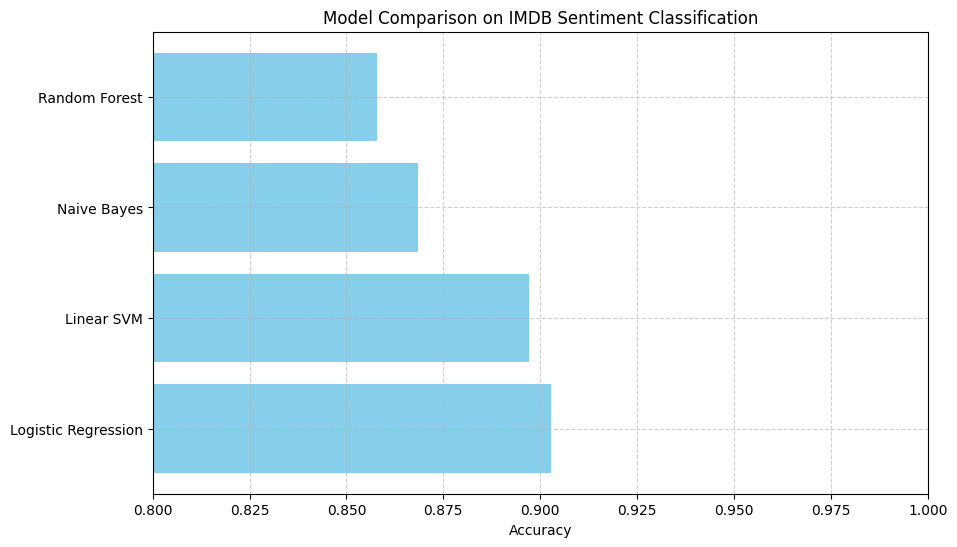

In [7]:
# 5. Summary Visualization
model_names = [name for name, _ in results]
accuracies = [acc for _, acc in results]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison on IMDB Sentiment Classification')
plt.xlim(0.8, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()